# **Analysis of Crime Data from Montgomery County, MD**

## **Keya Girish**

### **Introduction**

This project is based on Crime Incidents - Montgomery County, MD as of 03/24/2018. 

**1.DATA COLLECTION**

Data for this project is obtained from ‘https://www.kaggle.com/baboyma/crime-incidents-montgomery-county-md’. This data is in csv format and the file name is ‘MontgomeryCountyMD_Crime_20180324.csv’. It is loaded into a dataframe which is then cleansed, analyzed, visualized and subject to machine learning. The total number of rows initially loaded into the dataframe is 94847.

In [3]:
!pip install folium
import folium
import requests
from folium import plugins
import folium.plugins as plugins
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.max_columns', None)
df = pd.read_csv("MontgomeryCountyMD_Crime_20180324.csv", low_memory=False)

print("\nTotal number of rows = " + str(len(df)))
df.head()


Total number of rows = 94847


,Incident ID,Offence Code,CR Number,Dispatch Date/Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block_Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Start Date/Time,End Date/Time,Latitude,Longitude,Police District Number,Location
0,201087096,2399,16033231,07/01/2016 12:21:16 AM,23H,1,Crime Against Property,All other Larceny,LARCENY (DESCRIBE OFFENSE),GERMANTOWN,19600 CRYSTAL ROCK DR,GERMANTOWN,MD,20874.0,MCPD,Residence - Apartment/Condo,N,5N1,595.0,19600.0,07/01/2016 12:22:00 AM,NaN,39.177994,-77.261714,5D,"(39.177993504815994, -77.261713770478252)"
1,201087097,2303,16033232,07/01/2016 12:04:56 AM,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,WHEATON,13700 CONNECTICUT AVE,SILVER SPRING,MD,20906.0,MCPD,Retail - Other,K,4K2,337.0,13700.0,07/01/2016 12:04:00 AM,NaN,39.078907,-77.080792,4D,"(39.078907345412624, -77.080791908039089)"
2,201087097,5202,16033232,07/01/2016 12:04:56 AM,520,1,Crime Against Society,Weapon Law Violations,WEAPON - CONCEALED,WHEATON,13700 CONNECTICUT AVE,SILVER SPRING,MD,20906.0,MCPD,Retail - Drug Store/Pharmacy,K,4K2,337.0,13700.0,07/01/2016 12:04:00 AM,NaN,39.078907,-77.080792,4D,"(39.078907345412624, -77.080791908039089)"
3,201087097,5707,16033232,07/01/2016 12:04:56 AM,90J,1,Crime Against Society,Trespass of Real Property,TRESPASSING,WHEATON,13700 CONNECTICUT AVE,SILVER SPRING,MD,20906.0,MCPD,Retail - Drug Store/Pharmacy,K,4K2,337.0,13700.0,07/01/2016 12:04:00 AM,NaN,39.078907,-77.080792,4D,"(39.078907345412624, -77.080791908039089)"
4,201087100,1315,16033233,07/01/2016 12:32:17 AM,13A,1,Crime Against Person,Aggravated Assault,ASSAULT - AGGRAVATED - OTHER,GERMANTOWN,19700 FREDERICK RD,GERMANTOWN,MD,20876.0,MCPD,Convenience Store,M,5M1,468.0,19700.0,07/01/2016 12:32:00 AM,NaN,39.178541,-77.238493,5D,"(39.178541261093216, -77.238492567560044)"


**2.DATA PROCESSING**

The unique values of various columns of interest are analyzed below to select the attributes that will paint a clear picture of the crime in Montgomery County, MD.

In [4]:
df1 = df

OffenceCode = sorted(df1["Offence Code"].unique())
print("Number of unique Offence Codes = " + str(len(OffenceCode)))
#293
df1["Crime Name3"] = df1["Crime Name3"].astype(str)
CrimeName3 = sorted(df1["Crime Name3"].unique())
print("Number of unique Crime Name3s = " + str(len(CrimeName3)))
#292

NIBRS_Code = sorted(df1["NIBRS Code"].unique())
print("Number of unique NIBRS Codes = " + str(len(NIBRS_Code)))
#51
df1["Crime Name2"] = df1["Crime Name2"].astype(str)
CrimeName2 = sorted(df["Crime Name2"].unique())
print("Number of unique Crime Name2s = " + str(len(CrimeName2)))
#53

df1["Crime Name1"] = df1["Crime Name1"].astype(str)
CrimeName1 = sorted(df1["Crime Name1"].unique())
print(CrimeName1)
#['Crime Against Person', 'Crime Against Property', 'Crime Against Society', 'Not a Crime', 'Other', 'nan']

Number of unique Offence Codes = 293
Number of unique Crime Name3s = 292
Number of unique NIBRS Codes = 51
Number of unique Crime Name2s = 53
['Crime Against Person', 'Crime Against Property', 'Crime Against Society', 'Not a Crime', 'Other', 'nan']


The ‘Offence Code’ column has 293 distinct values while ‘Crime Name3’ column has 292 distinct values. This implies that Offence Code represents Crime Name3. The ‘NIBRS Code’ column has 51 distinct values while ‘Crime Name2’ column has 53 distinct values. This implies that NIBRS Code represents Crime Name2. In both the cases, there is not an exact match between codes and names due to possible data entry issues. Since ‘Offence Code’ and ‘NIBRS Code’ do not offer any additional information, ‘Crime Name3’ and ‘Crime Name2’ are considered for further evaluation. Next, we find that ‘Crime Name1’ has 5 distinct values. Thus, we conclude that ‘Crime Name1’ provides the broadest category of classification of crime, ‘Crime Name2’ provides more detailed classification of crime, and ‘Crime Name3’ provides the narrowest category of classification of crime. Since, ‘Crime Name1’ is too broad to extract any meaningful information from the crime data, it is not considered further in the project.

In [5]:
df1["Police District"] = df1["Police District Name"] + "-" + df1["Police District Number"]
PoliceDistrict = sorted(df1["Police District"].unique())
print(PoliceDistrict)

['BETHESDA-2D', 'CITY OF TAKOMA PARK-TPPD', 'GERMANTOWN-5D', 'MONTGOMERY VILLAGE-6D', 'OTHER-OTHER', 'ROCKVILLE-1D', 'SILVER SPRING-3D', 'TAKOMA PARK-TPPD', 'WHEATON-4D']


Next, the unique values of ‘Police District Name’ and ‘Police District Number’ are examined and we find that the reported crime takes place under 7 different police districts, ROCKVILLE-1D, BETHESDA-2D, SILVER SPRING-3D, WHEATON-4D, GERMANTOWN-5D, MONTGOMERY VILLAGE-6D, and TAKOMA PARK-TPPD. The value of OTHER could be due to a data entry issue.

In [6]:
df1["Dispatch Year"] = df1["Dispatch Date/Time"].str.slice(6,10) + '/' + df1["Dispatch Date/Time"].str.slice(0,2)
df1["Dispatch Year"] = df["Dispatch Year"].astype(str)
DispatchYear = sorted(df["Dispatch Year"].unique())
print(DispatchYear)

['2010/03', '2010/09', '2011/01', '2011/09', '2012/12', '2014/09', '2016/01', '2016/02', '2016/06', '2016/07', '2016/08', '2016/09', '2016/10', '2016/11', '2016/12', '2017/01', '2017/02', '2017/03', '2017/04', '2017/05', '2017/06', '2017/07', '2017/08', '2017/09', '2017/10', '2017/11', '2017/12', '2018/01', '2018/02', '2018/03', 'nan']


Next, we examine the month and year when the crimes occur. We find that the bulk of the reported crimes occur in the years 2016 and 2017. Further, we find that 2017 is the only year containing the crime data for all the years. Hence, a decision is made not to use the year and month data for trend analysis and machine learning. Instead, the crime distribution throughout the working hours daily is used for this purpose.

A quick glance at the sample data printed in earlier indicates that 'End Date/Time' has a lot of null values and will skew our analysis if it is considered. Hence, this column is dropped. 'Start Date/Time' and ‘Dispatch Date/Time’ have almost identical values. Hence, 'Start Date/Time' column is dropped and ‘Dispatch Date/Time’ is only considered. 'Crime Name1' column is also dropped for reasons described earlier. Then, all the rows containing at least one null value are dropped.

In [7]:
df.drop(['Start Date/Time'], axis = 1, inplace=True)
df.drop(['End Date/Time'], axis = 1, inplace=True)
df.drop(['Crime Name1'], axis = 1, inplace=True)
df.dropna(inplace=True) #DROP ALL THE ROWS WITH NAN
df.index = range(len(df)) #RE-INDEX THE DF

print("\nTotal number of rows = " + str(len(df)))
df.head()


Total number of rows = 78459


,Incident ID,Offence Code,CR Number,Dispatch Date/Time,NIBRS Code,Victims,Crime Name2,Crime Name3,Police District Name,Block_Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Latitude,Longitude,Police District Number,Location,Police District,Dispatch Year
0,201087096,2399,16033231,07/01/2016 12:21:16 AM,23H,1,All other Larceny,LARCENY (DESCRIBE OFFENSE),GERMANTOWN,19600 CRYSTAL ROCK DR,GERMANTOWN,MD,20874.0,MCPD,Residence - Apartment/Condo,N,5N1,595.0,19600.0,39.177994,-77.261714,5D,"(39.177993504815994, -77.261713770478252)",GERMANTOWN-5D,2016/07
1,201087097,2303,16033232,07/01/2016 12:04:56 AM,23C,1,Shoplifting,LARCENY - SHOPLIFTING,WHEATON,13700 CONNECTICUT AVE,SILVER SPRING,MD,20906.0,MCPD,Retail - Other,K,4K2,337.0,13700.0,39.078907,-77.080792,4D,"(39.078907345412624, -77.080791908039089)",WHEATON-4D,2016/07
2,201087097,5202,16033232,07/01/2016 12:04:56 AM,520,1,Weapon Law Violations,WEAPON - CONCEALED,WHEATON,13700 CONNECTICUT AVE,SILVER SPRING,MD,20906.0,MCPD,Retail - Drug Store/Pharmacy,K,4K2,337.0,13700.0,39.078907,-77.080792,4D,"(39.078907345412624, -77.080791908039089)",WHEATON-4D,2016/07
3,201087097,5707,16033232,07/01/2016 12:04:56 AM,90J,1,Trespass of Real Property,TRESPASSING,WHEATON,13700 CONNECTICUT AVE,SILVER SPRING,MD,20906.0,MCPD,Retail - Drug Store/Pharmacy,K,4K2,337.0,13700.0,39.078907,-77.080792,4D,"(39.078907345412624, -77.080791908039089)",WHEATON-4D,2016/07
4,201087100,1315,16033233,07/01/2016 12:32:17 AM,13A,1,Aggravated Assault,ASSAULT - AGGRAVATED - OTHER,GERMANTOWN,19700 FREDERICK RD,GERMANTOWN,MD,20876.0,MCPD,Convenience Store,M,5M1,468.0,19700.0,39.178541,-77.238493,5D,"(39.178541261093216, -77.238492567560044)",GERMANTOWN-5D,2016/07


The total number in the dataframe after cleansing the data is 78459. Hence, we find that only a small percentage of data is not considered for evaluation.

‘Dispatch Date/Time’ column has data in string format. This needs to be converted into datetime object so that each individual element of date and time can be extracted and used for analysis.

In [8]:
datetime_format = "%m/%d/%Y %I:%M:%S %p"
for idx in df.index:
    df.at[idx,"Dispatch Date/Time"] = datetime.strptime(df.at[idx,"Dispatch Date/Time"],datetime_format)

df.head()

,Incident ID,Offence Code,CR Number,Dispatch Date/Time,NIBRS Code,Victims,Crime Name2,Crime Name3,Police District Name,Block_Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Latitude,Longitude,Police District Number,Location,Police District,Dispatch Year
0,201087096,2399,16033231,2016-07-01 00:21:16,23H,1,All other Larceny,LARCENY (DESCRIBE OFFENSE),GERMANTOWN,19600 CRYSTAL ROCK DR,GERMANTOWN,MD,20874.0,MCPD,Residence - Apartment/Condo,N,5N1,595.0,19600.0,39.177994,-77.261714,5D,"(39.177993504815994, -77.261713770478252)",GERMANTOWN-5D,2016/07
1,201087097,2303,16033232,2016-07-01 00:04:56,23C,1,Shoplifting,LARCENY - SHOPLIFTING,WHEATON,13700 CONNECTICUT AVE,SILVER SPRING,MD,20906.0,MCPD,Retail - Other,K,4K2,337.0,13700.0,39.078907,-77.080792,4D,"(39.078907345412624, -77.080791908039089)",WHEATON-4D,2016/07
2,201087097,5202,16033232,2016-07-01 00:04:56,520,1,Weapon Law Violations,WEAPON - CONCEALED,WHEATON,13700 CONNECTICUT AVE,SILVER SPRING,MD,20906.0,MCPD,Retail - Drug Store/Pharmacy,K,4K2,337.0,13700.0,39.078907,-77.080792,4D,"(39.078907345412624, -77.080791908039089)",WHEATON-4D,2016/07
3,201087097,5707,16033232,2016-07-01 00:04:56,90J,1,Trespass of Real Property,TRESPASSING,WHEATON,13700 CONNECTICUT AVE,SILVER SPRING,MD,20906.0,MCPD,Retail - Drug Store/Pharmacy,K,4K2,337.0,13700.0,39.078907,-77.080792,4D,"(39.078907345412624, -77.080791908039089)",WHEATON-4D,2016/07
4,201087100,1315,16033233,2016-07-01 00:32:17,13A,1,Aggravated Assault,ASSAULT - AGGRAVATED - OTHER,GERMANTOWN,19700 FREDERICK RD,GERMANTOWN,MD,20876.0,MCPD,Convenience Store,M,5M1,468.0,19700.0,39.178541,-77.238493,5D,"(39.178541261093216, -77.238492567560044)",GERMANTOWN-5D,2016/07


**3.EXPLORATORY DATA ANALYSIS AND VISUALIZATION**

Our analysis will primarily focus on the distribution of different types of crimes across time and geography. For the types of crimes, we analyze crime2 and crime3. For the time distribution, we look into the trend across the working hours of a day. For geography, we visualize the distribution density of crimes across the entire county.

First, we determine the top ten crimes committed using crime2 as the input. We also show the frequency of each crime.

In [9]:
crime2 = sorted(df["Crime Name2"].unique())
crime2_counts = [] #Stores the (crime type, frequency) tuple

df1 = df

i = 0
for el in crime2:
    crime2_counts.append((el, df1.groupby('Crime Name2').count().values[i][0])) 
    i += 1

crime2_counts = sorted(crime2_counts, key=lambda x: x[1], reverse = True)
crime2_counts[0:10]

[('All Other Offenses', 17550),
 ('Theft From Motor Vehicle', 7467),
 ('Drug/Narcotic Violations', 6133),
 ('Simple Assault', 5377),
 ('Destruction/Damage/Vandalism of Property', 5193),
 ('Shoplifting', 4059),
 ('All other Larceny', 3868),
 ('Driving Under the Influence', 3626),
 ('Theft from Building', 3399),
 ('Burglary/Breaking and Entering', 2735)]

We notice that ‘All Other Offenses’ has a significantly higher frequency compared to the other crime types. Hence, we will obtain more details about this category of crime later on.

Ignoring the catch all category of ‘All Other Offenses’, we determine the top 5 specific crimes from the remaining crime categories. 

In [10]:
top_5_crime2 = crime2_counts[1:6]
top_5_crime2

[('Theft From Motor Vehicle', 7467),
 ('Drug/Narcotic Violations', 6133),
 ('Simple Assault', 5377),
 ('Destruction/Damage/Vandalism of Property', 5193),
 ('Shoplifting', 4059)]

They are 'Theft From Motor Vehicle', 'Drug/Narcotic Violations', 'Simple Assault', 'Destruction/Damage/Vandalism of Property' and 'Shoplifting' in the order of decreasing importance.

Next, we break down the super category, ‘All Other Offenses’ into individual sub categories using crime3. 

In [11]:
df1 = df.loc[df["Crime Name2"] == 'All Other Offenses']

crime3 = sorted(df1["Crime Name3"].unique())
crime3_counts = [] #Stores the (crime type, frequency) tuple

i = 0
for el in crime3:
    crime3_counts.append((el, df1.groupby('Crime Name3').count().values[i][0])) 
    i += 1

crime3_counts = sorted(crime3_counts, key=lambda x: x[1], reverse = True)
crime3_counts[0:10]

[('POLICE INFORMATION', 3885),
 ('LOST PROPERTY', 2687),
 ('MENTAL ILLNESS', 2487),
 ('MENTAL ILLNESS - EMERGENCY PETITION', 1730),
 ('SUDDEN DEATH', 1353),
 ('MISSING PERSON', 1266),
 ('RECOVERED PROPERTY - MONT CO.', 572),
 ('ALL OTHER OFFENSES', 405),
 ('PUBLIC PEACE - HARASSING COMMUNICATION', 347),
 ('RECOVERED PROPERTY - OTHER', 334)]

Looking at the top ten frequencies of the sub categories and comparing them to the top ten frequencies of the main categories, we find that the top 3 sub categories are comparable to the main categories in significance. But they are still less significant than the top 5 main specific categories shown above. Hence, we will use the top 5 main specific categories for further analysis.

We now look at the time distribution of all the crimes in a single day. We classify the 24 hours in a day, starting from midnight, into four different time periods, 'night', 'morning', 'afternoon', and 'evening'. Each time period has exactly 6 hours. Then we plot the frequency of all crimes against the time periods on a histogram.

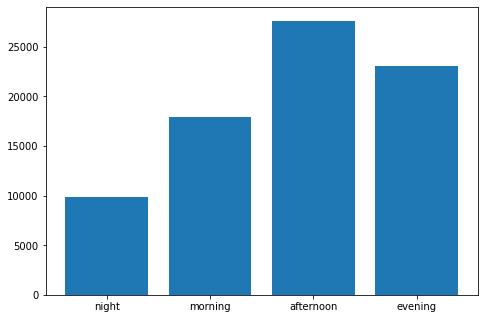

In [12]:
time_of_day = ['night', 'morning','afternoon','evening']
crime_frequency = [0,0,0,0]

for idx in df.index:
    hour = df.at[idx, "Dispatch Date/Time"].hour
    if ((hour >= 0) and (hour < 6)):
        crime_frequency[0] = crime_frequency[0] + 1
    if ((hour >= 6) and (hour < 12)):
        crime_frequency[1] = crime_frequency[1] + 1
    if ((hour >= 12) and (hour < 18)):
        crime_frequency[2] = crime_frequency[2] + 1
    if ((hour >= 18) and (hour < 24)):
        crime_frequency[3] = crime_frequency[3] + 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(time_of_day,crime_frequency)
plt.show()

We observe that there is a steady increase in crime starting from night till afternoon followed by a slight decrease in crime in the evening. This also indicates that there is an overall increase in crime during the typical working hours of 10 am through 6 pm.

Next, we plot the geographic distribution of each of the top 5 main specific categories of crime across Montgomery County. With the help of folium, first we plot the map of the Montgomery County using the latitude and longitude obtained from the website, https://www.findlatitudeandlongitude.com/l/montgomery+county+maryland/13456/. Then, for each crime category, we restrict the dataframe to the crime category and overlay the map with latitude and longitude of all the crimes belonging to that category. 

In [13]:
base_map = folium.Map(location=[39.154743, -77.240515], zoom_start=10)

def display_heatmap(crime2):
    df1 = df.loc[df['Crime Name2'] == crime2]
    
    # Create the HeatMap then add to base_map
    HeatMap(data=df1[['Latitude','Longitude']].groupby(['Latitude','Longitude']).sum().reset_index().values.tolist(), radius=7, max_zoom=10).add_to(base_map)
    
    # display map
    return base_map

Following are the heatmaps of the top 5 crime categories.

In [14]:
display_heatmap('Theft From Motor Vehicle')

**The heatmap shows 'Theft From Motor Vehicle' across Montgomery County**

In [15]:
display_heatmap('Drug/Narcotic Violations')

**The heatmap shows 'Drug/Narcotic Violations' across Montgomery County**

In [16]:
display_heatmap('Simple Assault')

**The heatmap shows 'Simple Assault' across Montgomery County**

In [17]:
display_heatmap('Destruction/Damage/Vandalism of Property' )

**The heatmap shows 'Destruction/Damage/Vandalism of Property' across Montgomery County**

In [18]:
display_heatmap('Shoplifting')

**The heatmap shows 'Shoplifting' across Montgomery County.**

All the heatmaps appear to be almost identical. This implies that irrespective of the type of crime, some locations are highly crime prone while other locations are not. The southeast corner of the county has more crime while the west has almost no crime. This could be due to the west being away from big urban areas. The crime across the rest of the county is evenly distributed.

**4.ANALYSIS USING MACHINE LEARNING**

Finally, we can glean useful information regarding crime in Montgomery County by applying machine learning techniques on the input data. Specifically, we intend to perform linear regression on the frequency of crime during the working hours of the day from 10 am through 6 pm for the topmost crime category, 'Theft From Motor Vehicle'. Using this model, we can predict the crime during the later hours of the day. We will also be extracting the frequency of the other 4 crimes in the top 5 category and comparing them.

First, we extract the frequency of each of the top 5 crimes for every 2 hours starting from 10 am through 6 pm daily and store them in an array of crimes.


In [19]:
top_5_crime2_list = []
for crime,count in top_5_crime2:
    top_5_crime2_list.append(crime)

daily_hourly_crime = {}
for crime in top_5_crime2_list:
    daily_hourly_crime[crime] = {}
    for hour in [10, 12, 14, 16, 18]:
        daily_hourly_crime[crime][hour] = 0
# crime_per_year is a hash with key:crime value:hash(key:year value:count)

for idx in df.index:
    row = df.loc[idx]
    hour = row["Dispatch Date/Time"].hour
    crime = row["Crime Name2"]
    if crime in daily_hourly_crime:
        if hour in daily_hourly_crime[crime]:
            daily_hourly_crime[crime][hour] += 1

Now, we plot the data for the topmost crime category, 'Theft From Motor Vehicle'.

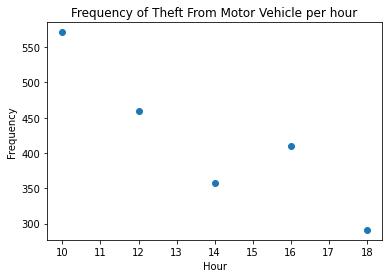

In [20]:
crime = "Theft From Motor Vehicle"

hours = []
counts = []
for hour in sorted(daily_hourly_crime[crime].keys()):
    hours.append(hour)
    counts.append(daily_hourly_crime[crime][hour])

plt.plot(hours,counts,'o')
plt.title("Frequency of {} per hour".format(crime))
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.show()

We notice that there is a decreasing trend of crimes with time. If we imagine a line starting from hour 10 ending in hour 18, it will approximately bisect the data. Hence, we will use the linear regression model from sklearn to plot trend line.

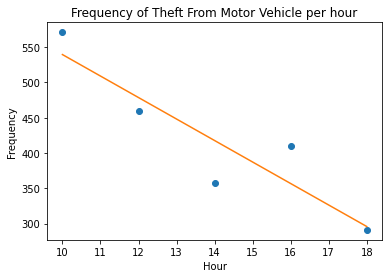

In [21]:
crime = "Theft From Motor Vehicle"

hours = []
counts = []
for hour in sorted(daily_hourly_crime[crime].keys()):
    hours.append(hour)
    counts.append(daily_hourly_crime[crime][hour])

plt.plot(hours,counts,'o')

hours_ = []
for h in hours:
    hours_.append([h])

lin = linear_model.LinearRegression()
lin.fit(hours_,counts)
predicted = lin.predict(hours_)

plt.plot(hours,predicted)
plt.title("Frequency of {} per hour".format(crime))
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.show()

We have modelled the data using Linear Regression and it is identified by the variable, lin. The function call, lin.fit(X,Y) is then used to obtain the data fitting the linear regression trend line and this is then plotted on the graph. As predicted, the trend line is slopping downwards.

We now calculate the R^2 score of the model. This value tells us how well the model fits our data. 

In [22]:
print(lin.score(hours_,counts))

0.8241213958118534


The score in this case is -0.8241213958118534. The negative sign indicates that the trend is decreasing.

In [23]:
lin.predict([[20]])

array([234.9])

Based on the trend line, we can predict that the frequency of crime at 20 hours would be 234.9.

Examining the trend line above, we notice that some of the data is not close to the trend line. We will see if we can improve the score by using polynomial features. We model the data using a polynomial function of degree 2. This means that the trend line will have an equation of y = a1*x^2 + a2*x + b instead of y = ax+b. 

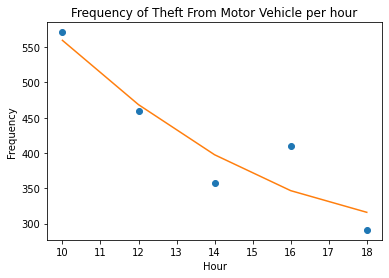

0.8556762947650707


In [24]:
plt.plot(hours,counts,'o')

poly = PolynomialFeatures(degree=2)
poly_hours = poly.fit_transform(hours_)
lin.fit(poly_hours,counts)

poly_pred = lin.predict(poly_hours)
plt.title("Frequency of {} per hour".format(crime))
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.plot(hours,poly_pred)

plt.show()
print(lin.score(poly_hours,counts))

We find that the R^2 score has improved which means that it is a better prediction. We also notice the trend line is closer to the majority of data points and hence a better fit.

We see if we can improve the fit by using a polynomial function of degree 3 which has the equation, y = a1*x^3 + a2*x^2 + a3*x + b.

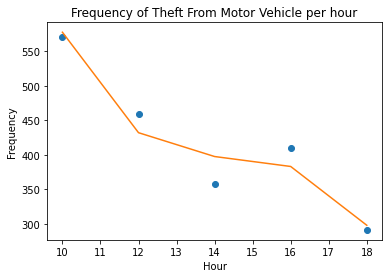

0.9292799496162851


In [25]:
plt.plot(hours,counts,'o')

poly = PolynomialFeatures(degree=3)
poly_hours = poly.fit_transform(hours_)
lin.fit(poly_hours,counts)

poly_pred = lin.predict(poly_hours)
plt.title("Frequency of {} per hour".format(crime))
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.plot(hours,poly_pred)

plt.show()
print(lin.score(poly_hours,counts))

We find that the model is even better at predicting since the R^2 score is even higher compared to models with degrees 1 and 2. However, the fit of the trend line with the data is unnatural. Hence, linear regression with polynomial degree of 2 seems to best model the daily crime data for the category, 'Theft From Motor Vehicle'.

We then create a function using the same code we used to plot the linear regression of 'Theft From Motor Vehicle'. Using this function, we will plot the linear regression trend lines for the remaining 4 top crime categories.

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

def model_crime(crime,daily_hourly_crime):
    hours = []
    counts = []
    for hour in sorted(daily_hourly_crime[crime].keys()):
        hours.append(hour)
        counts.append(daily_hourly_crime[crime][hour])
    
    plt.plot(hours,counts,'o')
    
    hours_ = []
    for h in hours:
        hours_.append([h])
    
    lin = linear_model.LinearRegression()
    lin.fit(hours_,counts)
    predicted = lin.predict(hours_)

    plt.plot(hours,predicted)
    plt.title("Frequency of {} per hour".format(crime))
    plt.xlabel("Hour")
    plt.ylabel("Frequency")
    plt.show()

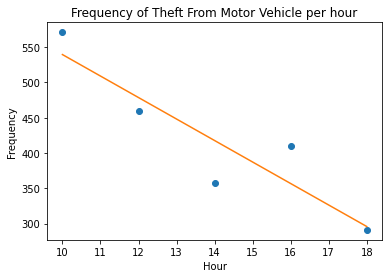

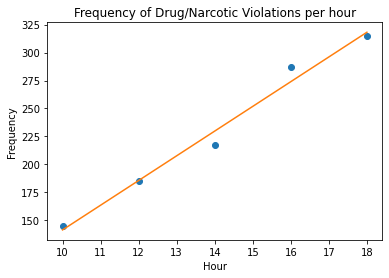

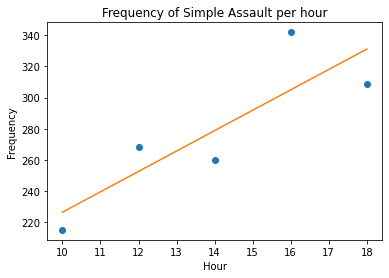

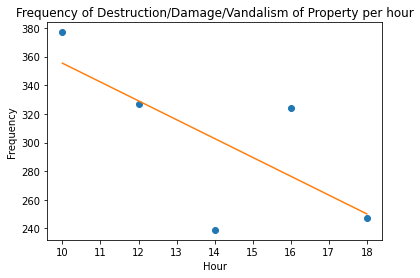

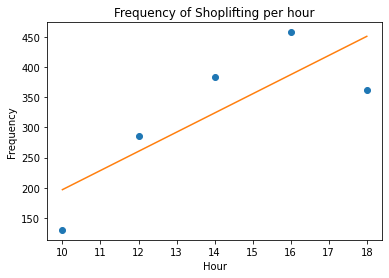

<IPython.core.display.Javascript object>

In [27]:
for crime in daily_hourly_crime:
    model_crime(crime,daily_hourly_crime)
  
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

We find that apart from 'Theft From Motor Vehicle', 'Destruction/Damage/Vandalism of Property' is the only crime having a decreasing trend. All the other crimes have increasing trend.

### **Conclusion**

Based on our analysis,

1. Since the all types of crimes are uniformly distributed throughout the county, all the police districts must be equally funded.

2. Since, certain types of crimes are increasing during the day, while others are decreasing, police personnel specializing in particular types of crimes can be deployed during different times of the day.